In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings 
# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
 
data=pd.read_excel('correctdataformat.xlsx')



In [3]:
# data=pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:



label_encoder = LabelEncoder()


for column in data.columns:
    if data[column].dtype == 'object': 
        data[column] = label_encoder.fit_transform(data[column])




In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.job

0         4
1         9
2         2
3         1
4        11
         ..
45206     9
45207     5
45208     5
45209     1
45210     2
Name: job, Length: 45211, dtype: int32

In [8]:
data.shape

(45211, 17)

In [9]:
x=data.iloc[:,:16]
y=data.iloc[:,16]

In [10]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [11]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [12]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [13]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

D:\INSTALLED_HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model.coef_

array([[-2.60118231e-02,  1.79784401e-02, -1.20506854e-01,
        -1.69487828e-02, -6.75245287e-03,  4.03510101e-05,
        -2.38678041e-01, -6.97743333e-02, -2.38700005e-01,
        -1.56186890e-02, -6.84708187e-02,  3.67763263e-03,
        -3.31469046e-01, -8.84218272e-04,  1.41698972e-01,
        -2.27520954e-01]])

In [16]:
model.intercept_

array([-0.09189353])

In [17]:
prediction=model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
df=pd.DataFrame({'Actual':y_test,
                'Predicted':prediction})
df

,Actual,Predicted
1392,0,0
7518,0,0
12007,0,0
5536,0,0
29816,0,0
...,...,...
12636,0,0
13364,0,0
16102,0,0
42097,0,0


In [19]:
r2_score(df['Actual'], prediction)

-0.10894931777801697

In [20]:
conf_matrix = confusion_matrix(y_test, prediction)

print(conf_matrix)

[[7833  152]
 [ 884  174]]


<Axes: >

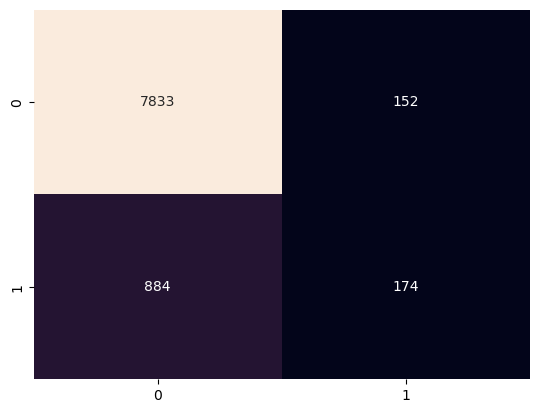

In [21]:
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False)

In [22]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.53      0.16      0.25      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



The model is performing well on class 0, with high precision, recall, and F1-score. It's able to correctly predict instances of class 0 with high accuracy.
However, the model's performance on class 1 is much weaker, indicated by low recall and F1-score. It's struggling to correctly identify instances of class 1.
The overall accuracy of 0.89 might be misleading due to the class imbalance. While the model's accuracy is relatively high, its performance on the minority class (class 1) needs improvement.

In [23]:
y_test

1392     0
7518     0
12007    0
5536     0
29816    0
        ..
12636    0
13364    0
16102    0
42097    0
31033    0
Name: y, Length: 9043, dtype: int32

In [24]:
model.predict_proba(x_test)

array([[0.93912448, 0.06087552],
       [0.9714539 , 0.0285461 ],
       [0.97886166, 0.02113834],
       ...,
       [0.87128371, 0.12871629],
       [0.88319522, 0.11680478],
       [0.87772812, 0.12227188]])

In [25]:
model.predict_proba(x_test)[:,1]

array([0.06087552, 0.0285461 , 0.02113834, ..., 0.12871629, 0.11680478,
       0.12227188])

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

In [27]:
fpr

array([0.00000000e+00, 0.00000000e+00, 5.00939261e-04, ...,
       9.62429555e-01, 9.62429555e-01, 1.00000000e+00])

In [28]:
tpr

array([0.00000000e+00, 9.45179584e-04, 9.45179584e-04, ...,
       9.99054820e-01, 1.00000000e+00, 1.00000000e+00])

In [29]:
pd.DataFrame({'False Positive Rate': fpr, 
             'True Positive Rate': tpr,
             'Thresholds': thresholds})

,False Positive Rate,True Positive Rate,Thresholds
0,0.000000,0.000000,1.999855e+00
1,0.000000,0.000945,9.998547e-01
2,0.000501,0.000945,9.926731e-01
3,0.000501,0.003781,9.903419e-01
4,0.000751,0.003781,9.877265e-01
...,...,...,...
1552,0.957295,0.998110,5.007120e-03
1553,0.957295,0.999055,4.990654e-03
1554,0.962430,0.999055,3.994752e-03
1555,0.962430,1.000000,3.993605e-03


In [30]:
auc = roc_auc_score(y_test, prediction)
auc

0.5727127778573483

Text(0.5, 1.0, 'logit model (area = 0.57)')

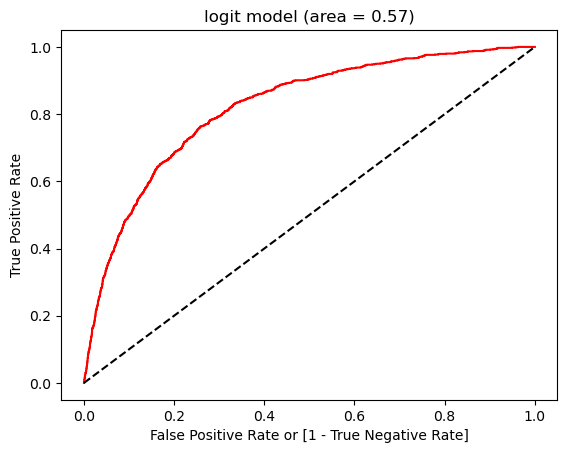

In [31]:
plt.plot(fpr, tpr, color='red') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('logit model (area = %0.2f)'%auc)

Resampling:

Since your classes are imbalanced, you can consider resampling techniques to balance the classes. There are two main approaches: oversampling and undersampling.
Oversampling: Create additional instances of the minority class (class 1) by duplicating or generating synthetic data points.
Undersampling: Reduce the number of instances of the majority class (class 0) to balance the classes.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np


# Assuming you have your data x and y defined

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE and RandomUnderSampler
smote = SMOTE(random_state=42)
rus = RandomUnderSampler(random_state=42)

# Apply resampling on the training set
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train, y_train)

# Initialize and train the logistic regression model
model_oversampled = LogisticRegression(random_state=42)
model_undersampled = LogisticRegression(random_state=42)

model_oversampled.fit(x_train_oversampled, y_train_oversampled)
model_undersampled.fit(x_train_undersampled, y_train_undersampled)

# Make predictions on the test data
y_pred_oversampled = model_oversampled.predict(x_test)
y_pred_undersampled = model_undersampled.predict(x_test)

# Make predictions on the train and test data
y_train_pred_oversampled = model_oversampled.predict(x_train)
y_train_pred_undersampled = model_undersampled.predict(x_train)



# Calculate accuracy
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)

# Calculate confusion matrices
confusion_matrix_oversampled = confusion_matrix(y_test, y_pred_oversampled)
confusion_matrix_undersampled = confusion_matrix(y_test, y_pred_undersampled)

print("Accuracy (Oversampled):", accuracy_oversampled)
print("Confusion Matrix (Oversampled):\n", confusion_matrix_oversampled)

print("Accuracy (Undersampled):", accuracy_undersampled)
print("Confusion Matrix (Undersampled):\n", confusion_matrix_undersampled)
# Import classification_report
from sklearn.metrics import classification_report

# Generate classification report for both cases
classification_report_oversampled = classification_report(y_test, y_pred_oversampled)
classification_report_undersampled = classification_report(y_test, y_pred_undersampled)

print("Classification Report (Oversampled):\n", classification_report_oversampled)
print("Classification Report (Undersampled):\n", classification_report_undersampled)

# Calculate training and test accuracies
train_accuracy_oversampled = accuracy_score(y_train, y_train_pred_oversampled)
train_accuracy_undersampled = accuracy_score(y_train, y_train_pred_undersampled)

test_accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
test_accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)

print("Training Accuracy (Oversampled):", train_accuracy_oversampled)
print("Test Accuracy (Oversampled):", test_accuracy_oversampled)

print("Training Accuracy (Undersampled):", train_accuracy_undersampled)
print("Test Accuracy (Undersampled):", test_accuracy_undersampled)


Accuracy (Oversampled): 0.7980758597810461
Confusion Matrix (Oversampled):
 [[6474 1511]
 [ 315  743]]
Accuracy (Undersampled): 0.7785027092778946
Confusion Matrix (Undersampled):
 [[6254 1731]
 [ 272  786]]
Classification Report (Oversampled):
               precision    recall  f1-score   support

           0       0.95      0.81      0.88      7985
           1       0.33      0.70      0.45      1058

    accuracy                           0.80      9043
   macro avg       0.64      0.76      0.66      9043
weighted avg       0.88      0.80      0.83      9043

Classification Report (Undersampled):
               precision    recall  f1-score   support

           0       0.96      0.78      0.86      7985
           1       0.31      0.74      0.44      1058

    accuracy                           0.78      9043
   macro avg       0.64      0.76      0.65      9043
weighted avg       0.88      0.78      0.81      9043

Training Accuracy (Oversampled): 0.7971411192214112
Test Accu

In both cases, the difference between the training and test accuracies is not very large, which is a positive sign. This suggests that the models are not memorizing the training data and are generalizing reasonably well to unseen test data.these results indicate that overfitting is not a major concern, it's still important to consider other evaluation metrics, such as precision, recall, and F1-score, to ensure that the models are performing well on both the majority and minority classes.

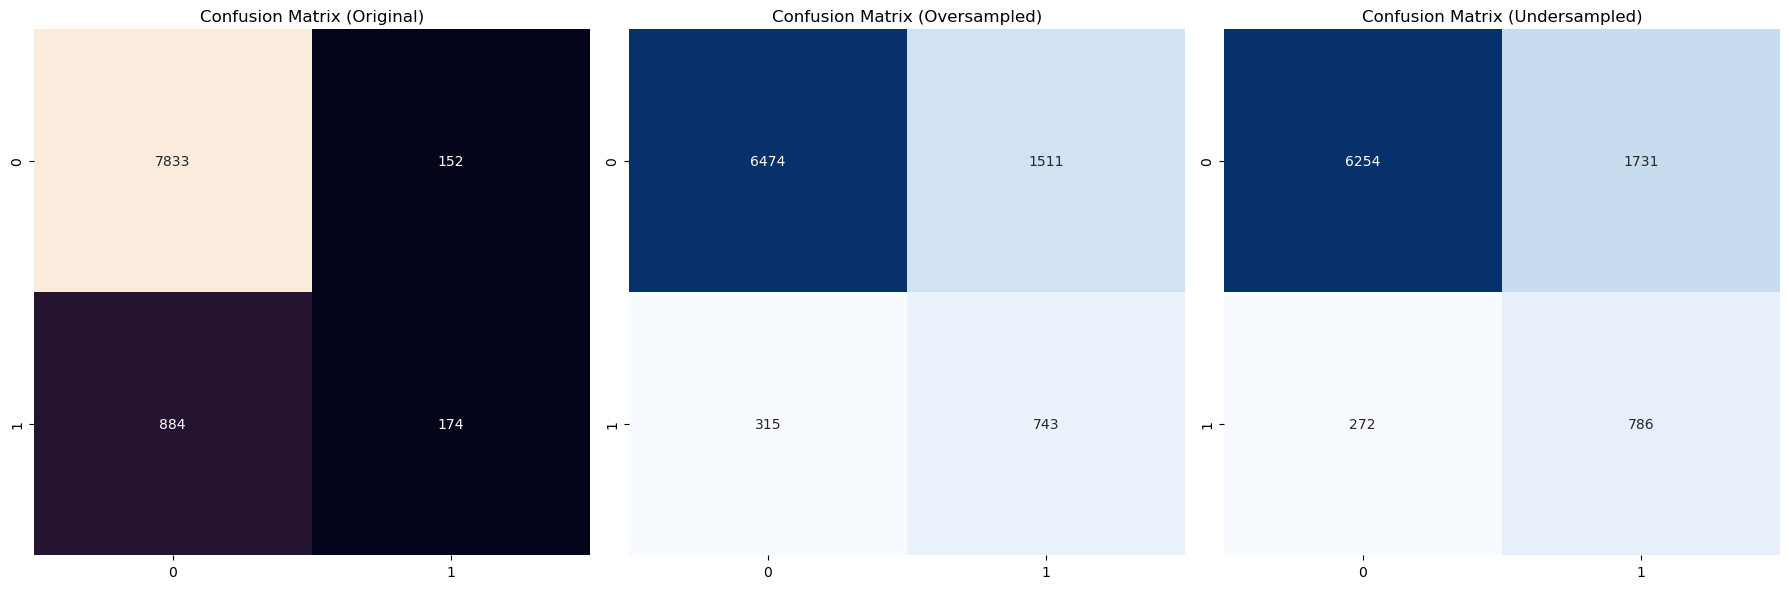

In [33]:
# Plot all three confusion matrices using seaborn heatmap
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False)
plt.title("Confusion Matrix (Original)")

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix_oversampled, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.title("Confusion Matrix (Oversampled)")

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix_undersampled, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.title("Confusion Matrix (Undersampled)")

plt.tight_layout()
plt.show()

<!DOCTYPE html>
<html>
<body>
    <h2>Conclusion - Addressing Class Imbalance with Stratification, Oversampling, and Undersampling:</h2>
    <h3>Insights:</h3>
    <ul>
        <li>The original scenario, while having the highest accuracy, struggles to perform well on the minority class (class 1) due to class imbalance.</li>
        <li>Both oversampling and undersampling techniques have shown improvements in capturing instances of the minority class, resulting in better precision and recall for class 1.</li>
        <li>However, the F1-scores for class 1 are still relatively low in both oversampled and undersampled scenarios, indicating that there is still room for improvement in terms of balancing precision and recall for the minority class.</li>
    </ul>
    <h3>Choice of Model for Final Selection:</h3>
    <p>If precision and recall for class 1 are crucial, the oversampled scenario might be preferred, as it strikes a better balance between the two.</p>
    <p>Further experimentation with other techniques, algorithms, or model tuning might lead to even better results.</p>
</body>
</html>


<!DOCTYPE html>
<html>
<head>
   
</head>
<body>
    <h3>Further Exploration:</h3>
    <p>It's important to remember that this analysis serves as a starting point. There are several avenues for further exploration:</p>
    <ul>
        <li><strong>Algorithm Selection:</strong> Experiment with different classification algorithms, as some models might inherently perform better on imbalanced datasets.</li>
        <li><strong>Feature Engineering:</strong> Enhance feature selection and engineering to provide better discrimination between classes.</li>
        <li><strong>Hyperparameter Tuning:</strong> Fine-tune hyperparameters for both the chosen model and the resampling techniques to optimize performance.</li>
        <li><strong>Ensemble Methods:</strong> Consider ensemble methods that combine multiple models to improve overall performance.</li>
    </ul>
</body>
</html>
